In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pylab as pl
#plt.rc("font", size=14)
import seaborn as sns
from scipy.interpolate import spline,interpolate   
sns.set(style="whitegrid")
#sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [2]:
data_path = '../data/'
zero_count_file = data_path + 'zero_count.csv'
raw_data_file = data_path + 'data_gzip.csv'
zero_filter_file = data_path + 'data_zero_filter_01_30.csv'
label_file = data_path + 'info.csv'

series_file = data_path + 'fetal_series_01_30.npy'
series_smooth_file = data_path + 'fetal_series_smooth.npy'
image_file = data_path + 'fetal_image_01_30_bold.npy'

In [3]:
data = pd.read_csv(zero_count_file)
data1 = np.array(data)
data1 = data1.reshape(1,data1.shape[0])
data1.shape

(1, 24359)

In [4]:
data = pd.read_csv(zero_count_file)
data1 = np.array(data)
data1

array([[2283],
       [2265],
       [2255],
       ...,
       [   0],
       [   0],
       [   0]])

In [5]:
sns.set(rc={"figure.figsize": (16, 8)});
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax = sns.distplot(data1,bins=40,hist=True,kde=False,vertical=True,stick)

ax.set_xlabel('sample number',)
ax.set_ylabel('missing value number')
plt.savefig(datapath + 'zero_count_rate.png', bbox_inches='tight')

SyntaxError: non-keyword arg after keyword arg (<ipython-input-5-e026820b24a0>, line 4)

In [5]:
sample = pd.read_csv(zero_filter_file)

In [6]:
del sample['id']

In [7]:
sample1 = sample.loc[1]

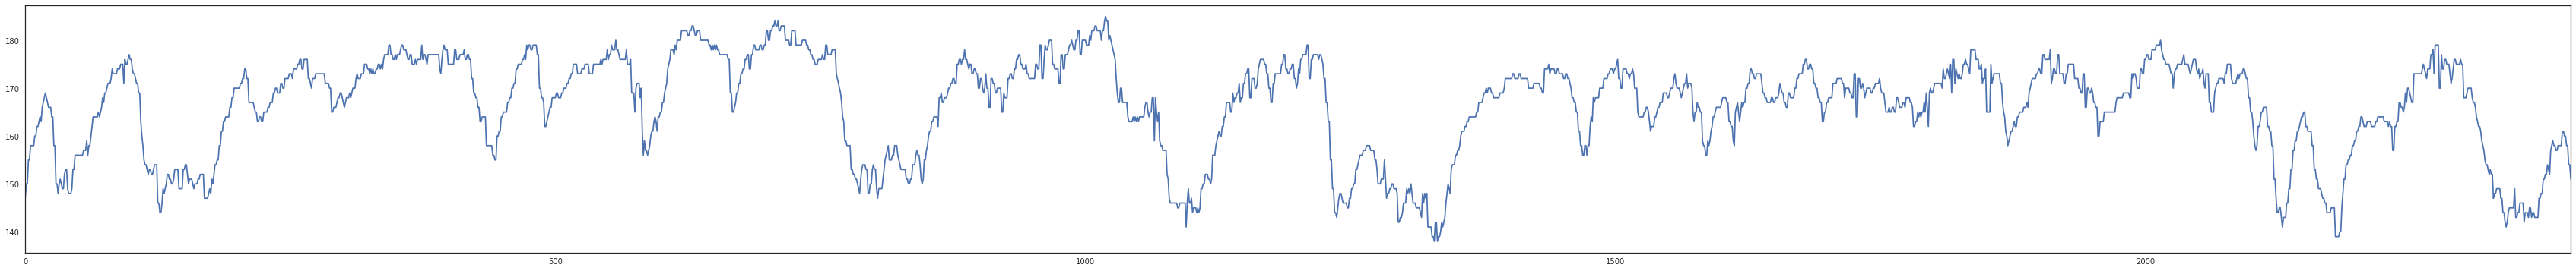

In [22]:
sns.set(rc={"figure.figsize": (60, 6)},style='white');
ax = sns.tsplot(data=sample1)
plt.savefig(data_path + 'sample_img.png')

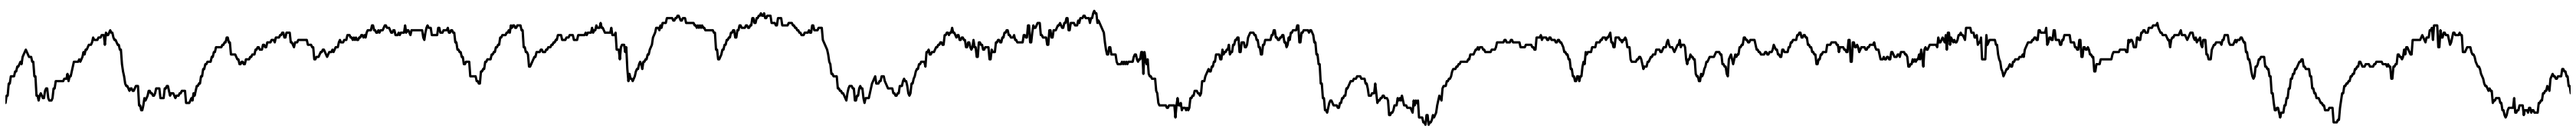

In [23]:
# 画出与原始大小一样的图片
sns.set(rc={"figure.figsize": (60, 3),"lines.linewidth": 3},style='white');
plt.xticks([])
plt.yticks([])
plt.axis('off')
sns.tsplot(data=sample1,color="black")
plt.savefig(data_path + 'sample_img_none.jpg',bbox_inches='tight',edgecolor='white')


[147 150 150 ... 154 154 151]


/usr/local/lib/python2.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


(3362, 177)

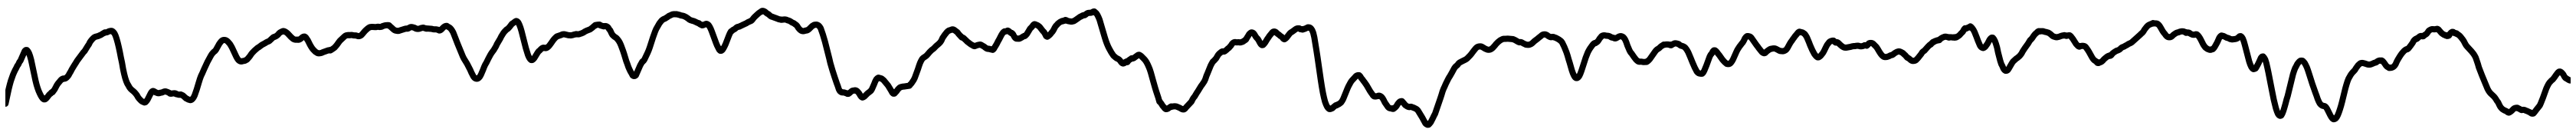

In [8]:
x = np.linspace(0,2402,2402)
y = np.array(sample1)
print(y)
#y = y0.reshape(1, 2402)
yhat = savitzky_golay(y,window_size=31,order=4)
sns.set(rc={"figure.figsize": (60, 3),"lines.linewidth": 8},style='white');
plt.xticks([])
plt.yticks([])
plt.axis('off')
sns.tsplot(data = yhat,color="black")

plt.savefig('../data/test.png', bbox_inches='tight', edgecolor='white')
im = Image.open('../data/test.png')
im_size = im.size
im_size
#plt.plot(x, yhat,'r-')




In [12]:
f = np.load(series_file)
x, y = f[:, 0:-1], f[:, -1:]
num_data = x.shape[0]
num_data

22175

In [ ]:
# 生成胎心率曲线图片
f = np.load(series_smooth_file)
x, y = f[:, 0:-1], f[:, -1:]
num_data = x.shape[0]
img_dir = data_path + 'smooth/'

for i in range(11932, num_data):
    if (i % 1000 == 0):
        print('i = %s' % i)
    savename = str(i) + '.png'
    yhat = savitzky_golay(x[i,:], window_size=31, order=4)
    sns.set(rc={"figure.figsize": (60, 3), "lines.linewidth": 8}, style='white');
    #sns.set_context('paper')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    sns.tsplot(data = yhat,color="black")
    plt.savefig(img_dir+savename, bbox_inches='tight', edgecolor='white')
    plt.close('all')

i = 12000


In [29]:
for i in range(11691, 11693):
    print(i)

11691
11692


In [15]:
# 读取图片，生成npy格式图片数据
f = np.load(series_file)
x, y = f[:, 0:-1], f[:, -1:]
num_data = x.shape[0]
img_dir = datapath + 'smooth/'
img = Image.open(img_dir+'1.png')
h, w = img.size
data_mat = np.zeros((num_data, h * w), dtype=np.uint8)
for i in range(num_data):
    if (i % 1000 == 0):
        print('i = %s' % i)
    savename = str(i) + '.png'
    img = Image.open(img_dir+savename)
    img_bi= img.convert('L') # 转化为灰度图
    img_array = np.array(img_bi)
    data_mat[i][:] = np.reshape(img_array, (1, h * w))

data_label_mat = np.hstack([data_mat, y])
np.save(image_file, data_label_mat)

i = 0
i = 1000
i = 2000
i = 3000
i = 4000
i = 5000
i = 6000
i = 7000
i = 8000
i = 9000
i = 10000
i = 11000
i = 12000
i = 13000
i = 14000
i = 15000
i = 16000
i = 17000
i = 18000
i = 19000
i = 20000
i = 21000
i = 22000


In [22]:
img = Image.open(img_dir+'1.png')
h, w = img.size
h, w
h *w


23452

In [195]:
im = Image.open("../data/smooth/smooth_2.png")
img_size = im.size
print("图片宽度和高度分别是{}".format(img_size))
x = 155
y = 0
w = img_size[0] - 2*x
h = img_size[1]
region = im.crop((x, y, x+w, y+h))
region.save("../data/smooth/crop_test1.png")
im = Image.open("../data/smooth/crop_test1.png")
img_size = im.size
print("图片宽度和高度分别是{}".format(img_size))

图片宽度和高度分别是(3362, 177)
图片宽度和高度分别是(3052, 177)


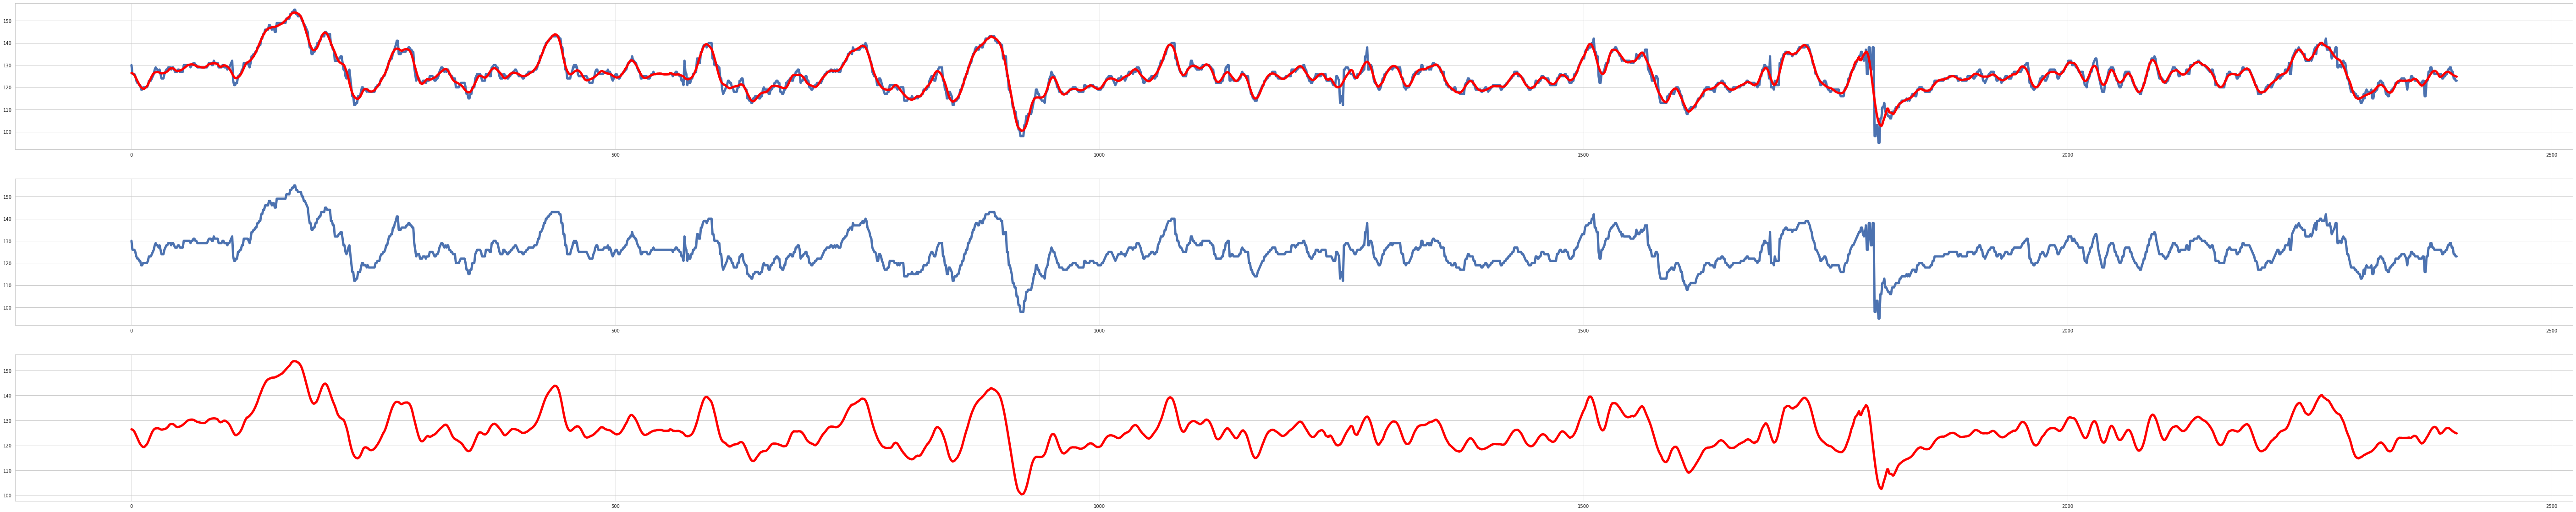

In [16]:
#平滑曲线图
sns.set(rc={"figure.figsize": (100, 20),"lines.linewidth": 5},style='whitegrid');

plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.plot(x, savitzky_golay(y,window_size=31,order=4), 'r-')


plt.subplot(3, 1, 2)
plt.plot(x, y)

plt.subplot(3, 1, 3)
plt.plot(x, savitzky_golay(y,window_size=31,order=4),'r-')

plt.savefig('../data/smooth_contrast_combine.png', bbox_inches='tight', edgecolor='white')

plt.show()

In [16]:
f = np.load(series_file)
x, y = f[1, 0:-1], f[1, -1:]
x_d = pd.DataFrame(x)
x_line = np.linspace(0,2402,2402)
sample = np.array(x_d).reshape(1,2402)
plt.plot(x_line, savitzky_golay(sample,window_size=31,order=4), 'black')
# ysg = savitzky_golay(sample, window_size=31, order=4)
# ysg
# sns.tsplot(data=pd.DataFrame(ysg), color="black")
# plt.savefig(img_dir+savename, bbox_inches='tight', edgecolor='white')

ValueError: object too deep for desired array

i = 0


ValueError: object too deep for desired array

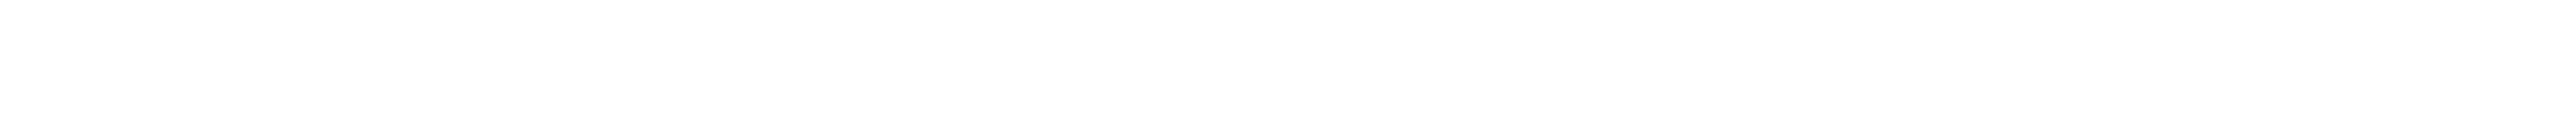

In [15]:
f = np.load(series_file)
x, y = f[:, 0:-1], f[:, -1:]
x_d = pd.DataFrame(x)
num_data = x.shape[0]
x_line = np.linspace(0,2402,2402)
#np.array(x_d.loc[0]).reshape(1,2402)

img_size = (3362, 177)
x_lc = 155
y_lc = 0
# 裁剪后的图像尺寸
w = img_size[0] - 2*x_lc
h = img_size[1]

data_mat = np.zeros((num_data, h * w), dtype=np.uint8)
img_smooth_dir = datapath + 'smooth/'
img_crop_dir = datapath + 'crop/'
sns.set(rc={"figure.figsize": (60, 3), "lines.linewidth": 3}, style='white');
plt.xticks([])
plt.yticks([])
plt.axis('off')

for i in range(2):#num_data
    if (i % 1000 == 0):
        print('i = %s' % i)
    savename = str(i) + '.png'
    sample = np.array(x_d.loc[i]).reshape(1,2402)
    plt.plot(x_line, savitzky_golay(sample,window_size=31,order=4), 'black')
    #ysg = savitzky_golay(sample, window_size=31, order=4)
    #sample = pd.DataFrame(ysg)
    #sns.tsplot(data=pd.DataFrame(ysg), color="black")
    plt.savefig(img_smooth_dir+savename, bbox_inches='tight', edgecolor='white')
    img = Image.open(img_dir+savename)
    region = img.crop((x_lc, y_lc, x+w, y+h))
    img_bi= region.convert('L')
    img_bi.save(img_smooth_dir+savename)
    img_array = np.array(img_bi)
    
    data_mat[i][:] = np.reshape(img_array, (1, h * w))
data_label_mat = np.hstack([data_mat, y])
np.save(image_file, data_label_mat)

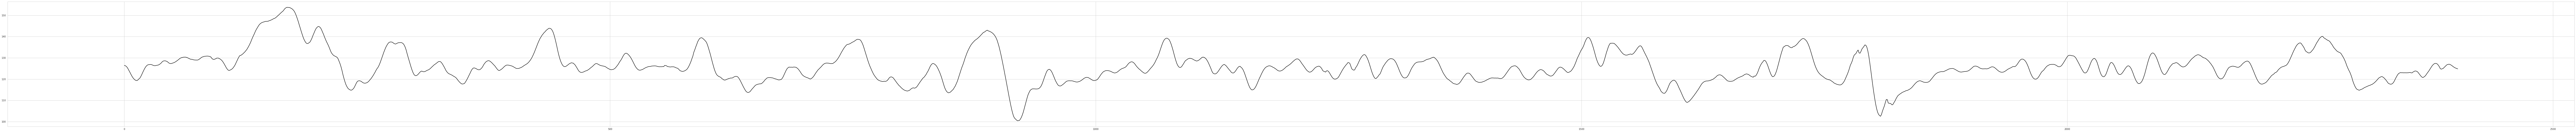

In [189]:
t = np.linspace(0,2402,2402)
y = np.array(sample1)
ysg = savitzky_golay(y, window_size=31, order=4)
import matplotlib.pyplot as plt
plt.figure(figsize=(200, 10)) 
#plt.plot(t, y, label='Noisy signal')
#plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
plt.plot(t, ysg, 'black')
#plt.savefig(img_dir+savename, bbox_inches='tight', edgecolor='white')
plt.savefig('../data/smooth/smooth_contrast.png', bbox_inches='tight', edgecolor='white')
plt.show()

In [210]:
import matplotlib.image as mpimg
f = np.load(series_file)
x, y = f[:, 0:-1], f[:, -1:]
x_d = pd.DataFrame(x)
num_data = x.shape[0]
h, w = 177, 2804
data_mat = np.zeros((num_data, h * w), dtype=np.uint8)
img_dir = datapath + 'img_data/'
x[2,:]
ysg = savitzky_golay(x[2,:], window_size=31, order=4)
y_d = pd.DataFrame(ysg).T
y_d
#print(x_d.loc[2])
#sns.tsplot(data=y_d, color="black")

,0,1,2,3,4,5,6,7,8,9,...,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401
0,147.0,148.976944,150.949135,152.796744,154.478208,155.973506,157.213773,158.352311,159.318435,160.200526,...,159.37931,158.971787,158.45586,157.663363,157.091617,156.870664,156.598139,156.351097,156.149358,156.1261
